In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.svm import SVC


### 1)

In [2]:
def linear_classifier(w, x, b):
    y = np.sign(np.dot(w,x)+b)
    return y

def perceptron(data, labels):
    n, d = data.shape
    w = np.zeros(d)
    b = 0 
    epochs = 0
    learning_rate=0.1
    max_epochs=100
    
    while epochs < max_epochs :
        errors = 0
        # Randomly permute the data
        perm = np.random.permutation(n)
        X = data[perm]
        y = labels[perm]
        
        for i in range(n): 
            x =X[i]
            y_true = y[i]
            y_pred = linear_classifier(w,x,b)
            
            if y_pred != y_true:
                w += learning_rate* y_true*x
                b += learning_rate*y_true
                errors +=1
        if errors == 0:
            break
        epochs += 1
    return w,b

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [1, 3]]
y = iris.target
X = X[y != 2]  # keep only classes 0 and 1
y = y[y != 2]
y = np.where(y == 0, -1, 1)  # map class 0 to -1

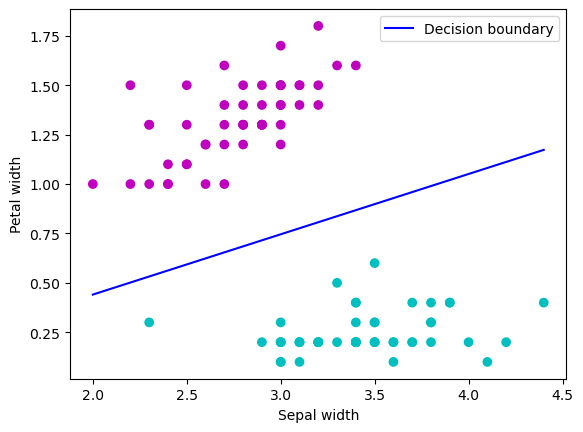

In [4]:
# Train Perceptron algorithm
w, b = perceptron(X, y)

# Plot data points
colors = ['m' if label == 1 else 'c' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap=plt.cm.Paired)
plt.xlabel("Sepal width")
plt.ylabel("Petal width")

# Plot decision boundary
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, "b-", label="Decision boundary")

plt.legend()
plt.show()

In [5]:
def updated_perceptron(data, labels):
    n, d = data.shape
    w = np.zeros(d)
    b = 0 
    epochs = 0
    learning_rate=0.1
    max_epochs=100
    updates = 0
    
    while epochs < max_epochs :
        errors = 0
        # Randomly permute the data
        perm = np.random.permutation(n)
        X = data[perm]
        y = labels[perm]
        
        for i in range(n): 
            x =X[i]
            y_true = y[i]
            y_pred = linear_classifier(w,x,b)
            
            if y_pred != y_true:
                w += learning_rate* y_true*x
                b += learning_rate*y_true
                updates += 1
                errors +=1
                
        if errors == 0:
            break
        epochs += 1
        
    return w,b,updates

In [6]:
# Run the algorithm 20 times and collect the number of updates needed each time
num_runs = 20
update_counts = []

for i in range(num_runs):
    w, b, updates = updated_perceptron(X, y)
    update_counts.append(updates)

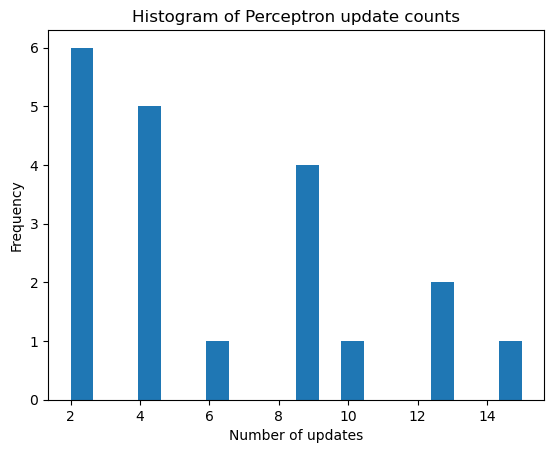

In [7]:
# Create a histogram of the update counts
plt.hist(update_counts, bins=20)
plt.xlabel('Number of updates')
plt.ylabel('Frequency')
plt.title('Histogram of Perceptron update counts')
plt.show()

### b)

In [8]:
iris = datasets.load_iris()
X2 = iris.data[:, [0, 2]]
y2 = iris.target
X2 = X2[y2 != 0]  # keep only classes 1 and 2
y2 = y2[y2 != 0]

Text(0.5, 1.0, 'Sepal length vs Petal length')

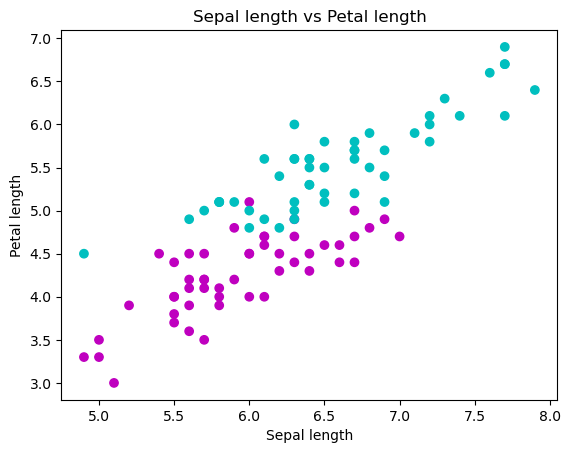

In [9]:
# Plot data points
colors = ['m' if label == 1 else 'c' for label in y2]
plt.scatter(X2[:, 0], X2[:, 1], c=colors, cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.title('Sepal length vs Petal length')

The data is not linearly seperable as you can see from the graph above. This means that we cannot use the perceptron since it would be running forever to find the decision boundary. We need an SVM to use support vectors to find a decision boundary. 

In [10]:
C_values = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
results = []


for C in C_values:
    # SVM classifier
    clf = SVC(kernel='linear', C=C)
    # fit the classifier to the data
    clf.fit(X2, y2)
    #training error
    y_pred = clf.predict(X)
    error = np.mean(y_pred != y)
    # count the number of support vectors
    n_support = np.sum(clf.n_support_)
    # store the results in the table
    results.append((C, error, n_support))

# print the table
print('C\tTraining error\t# Support vectors')
for C, error, n_support in results:
    print('{:.2e}\t{:f}\t{:d}'.format(C, error, n_support))

C	Training error	# Support vectors
1.00e-02	0.500000	92
1.00e-01	0.500000	56
1.00e+00	0.500000	31
1.00e+01	0.500000	18
1.00e+02	0.500000	14
1.00e+03	0.500000	14
1.00e+04	0.500000	14
1.00e+05	0.500000	14
1.00e+06	0.500000	13
1.00e+07	0.500000	13


We are choosing C=100 since it has one of the lowest training errors, but the support vectors are only 14 instead of 18 compared to 10. 


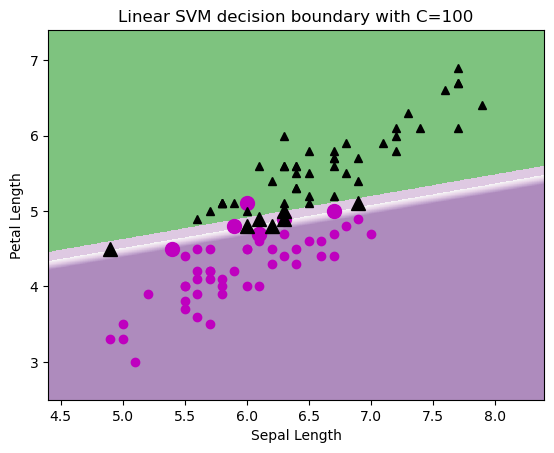

In [11]:
clf = SVC(kernel='linear', C=100)
clf.fit(X2, y2)

#support vectors
sv = np.zeros(100, dtype=bool)
sv[clf.support_] = True
notsv = np.logical_not(sv)

# plot the decision boundary
delta = 0.005
x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i] , 1.0)
    Z[i] = max(Z[i], -1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = -0.5
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.PRGn , vmin = -2 , vmax = 2)

# plot the data points
plt.plot(X2[(y2 == 1)*notsv , 0], X2[(y2 == 1)*notsv, 1], 'mo' )
plt.plot(X2[(y2 == 1)*sv , 0], X2[(y2 == 1)*sv, 1], 'mo', markersize=10 ) #support vectors
plt.plot(X2[(y2 == 2)*notsv , 0], X2[(y2 == 2)*notsv, 1], 'k^' )
plt.plot(X2[(y2 == 2)*sv , 0], X2[(y2 == 2)*sv, 1], 'k^', markersize=10 )
plt.title('Linear SVM decision boundary with C=100')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()